In [3]:
import statistics
import pandas as pd
import numpy as np
from scipy import stats

import matplotlib.pyplot as plt

from google.colab import drive 
drive.mount('/content/drive')

Mounted at /content/drive


In [4]:
import pandas as pd 

path ='/content/drive/MyDrive/CVS/data_fasilitas_kesehatan..csv' 
df = pd.read_csv(path) 

df.describe() 

,tahun,bulan,jumlah_yang_ada,jumlah_yang_dilaporkan
count,26.0,26.0,26.000000,26.000000
mean,2018.0,1.0,168.576923,167.461538
std,0.0,0.0,180.014705,169.511352
min,2018.0,1.0,1.000000,1.000000
25%,2018.0,1.0,39.750000,36.000000
50%,2018.0,1.0,84.500000,105.500000
75%,2018.0,1.0,224.500000,221.750000
max,2018.0,1.0,587.000000,587.000000


In [5]:
df

,tahun,bulan,wilayah,jenis_fasilitas_kesehatan_kb,jumlah_yang_ada,jumlah_yang_dilaporkan
0,2018,1,Jakarta Barat,Jejaring Fasilitas Kesehatan KB Lainnya,1,1
1,2018,1,Jakarta Selatan,Jejaring Fasilitas Kesehatan KB Lainnya,3,3
2,2018,1,Jakarta Pusat,Fasilitas Kesehatan KB Swasta,15,14
3,2018,1,Jakarta Barat,Fasilitas Kesehatan KB Swasta,22,17
4,2018,1,Jakarta Selatan,Fasilitas Kesehatan KB Swasta,28,28
5,2018,1,Jakarta Timur,Fasilitas Kesehatan KB Swasta,30,30
6,2018,1,Jakarta Timur,Praktek Dokter,35,29
7,2018,1,Jakarta Utara,Fasilitas Kesehatan KB Pemerintah,54,54
8,2018,1,Jakarta Pusat,Praktek Dokter,64,150
9,2018,1,Jakarta Pusat,Fasilitas Kesehatan KB Pemerintah,74,74


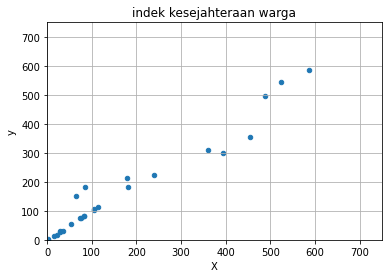

In [6]:
import matplotlib.pyplot as plt 

df.plot(kind='scatter', x='jumlah_yang_ada', y='jumlah_yang_dilaporkan') 

plt.title('indek kesejahteraan warga')
plt.xlabel('X')
plt.ylabel('y')
plt.xlim(0, 750)
plt.ylim(0, 750)
plt.grid(True)
plt.show()

In [7]:
import numpy as np
x = np.array(df['jumlah_yang_ada'])
y = np.array(df['jumlah_yang_dilaporkan'])

print(f'x : {x}')
print(f'y : {y}')

x : [  1   3  15  22  28  30  35  54  64  74  75  82  83  86 104 106 113 180
 181 239 361 393 454 489 524 587]
y : [  1   3  14  17  28  30  29  54 150  74  75  81  83 183 104 107 112 212
 181 225 311 299 354 497 543 587]


In [8]:
x = x.reshape(-1, 1)
x.shape

(26, 1)

In [9]:
x

array([[  1],
       [  3],
       [ 15],
       [ 22],
       [ 28],
       [ 30],
       [ 35],
       [ 54],
       [ 64],
       [ 74],
       [ 75],
       [ 82],
       [ 83],
       [ 86],
       [104],
       [106],
       [113],
       [180],
       [181],
       [239],
       [361],
       [393],
       [454],
       [489],
       [524],
       [587]])

In [10]:
# training model
from sklearn.linear_model import LinearRegression

model = LinearRegression()
model.fit(x, y) 

LinearRegression()

In [11]:
x_vis = np.array([0, 800]).reshape(-1, 1)
y_vis = model.predict(x_vis)

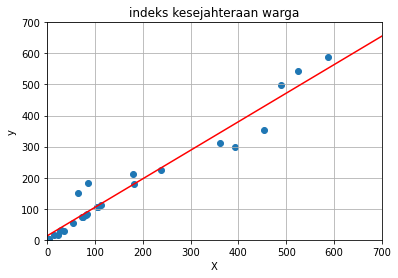

In [12]:
plt.scatter(x, y)
plt.plot(x_vis, y_vis, '-r')
plt.title('indeks kesejahteraan warga')
plt.xlabel('X')
plt.ylabel('y')
plt.xlim(0, 700)
plt.ylim(0, 700)
plt.grid(True)
plt.show()

In [13]:
print(f'intercept : {model.intercept_}')
print(f'slope : {model.coef_}')

intercept : 12.576499680180461
slope : [0.9187796]


In [14]:
jumlah_yang_ada = np.array([200, 300, 400, 500]).reshape(-1, 1)
jumlah_yang_ada

array([[200],
       [300],
       [400],
       [500]])

In [15]:
prediksi_indeks = model.predict(jumlah_yang_ada)
prediksi_indeks

array([196.33242066, 288.21038115, 380.08834164, 471.96630213])

In [16]:
for penduduk, index in zip(jumlah_yang_ada, prediksi_indeks):
  print(f'luas panen: {penduduk} produksi : {index}')

luas panen: [200] produksi : 196.3324206619422
luas panen: [300] produksi : 288.21038115282306
luas panen: [400] produksi : 380.0883416437039
luas panen: [500] produksi : 471.9663021345848


<function matplotlib.pyplot.show(*args, **kw)>

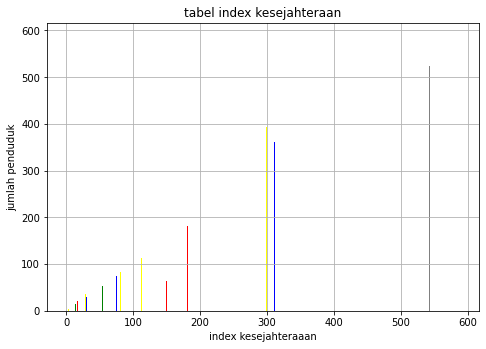

In [17]:
fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
indeks = (df['jumlah_yang_dilaporkan'])
jumlah = (df['jumlah_yang_ada'])
c = ['blue', 'yellow', 'green','red','gray']
plt.title("tabel index kesejahteraan")
plt.xlabel("index kesejahteraaan")
plt.ylabel("jumlah penduduk")
plt.bar(indeks, jumlah, color = c)
plt.grid(True)
plt.show 

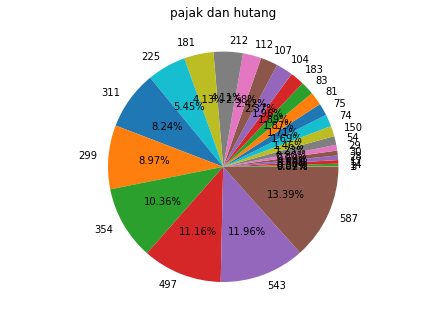

In [19]:
# PIECART
fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
ax.axis('equal')
plt.title("pajak dan hutang")
jurusan =df [ 'jumlah_yang_dilaporkan' ]
siswa = df['jumlah_yang_ada']
ax.pie(siswa,labels=jurusan,autopct='%1.2f%%')
plt.show()
print()